### Cell 1: Data Loading and Initial Exploration
This cell imports pandas, loads the diabetes dataset from a CSV file, and displays the first few rows and the structure of the DataFrame. It helps you understand the data's shape and the types of each column.

In [2]:
import pandas as pd

# Chargement des données
file_path = '/content/dataset-d.csv'  # Adaptez le chemin si besoin
df = pd.read_csv(file_path)

# Affichage des premières lignes
print('--- Aperçu des premières lignes ---')
display(df.head())

print('\n--- Informations sur les colonnes ---')
df.info()

--- Aperçu des premières lignes ---


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33



--- Informations sur les colonnes ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Cell 2: Data Cleaning and Visualization
This cell imports plotting libraries, removes an unnecessary column, checks for missing values and duplicates, shows descriptive statistics, and visualizes the distributions and correlations of the variables. This is essential for initial data exploration and quality checks.

--- Valeurs manquantes par colonne ---
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

--- Nombre de doublons ---
0

--- Statistiques descriptives ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


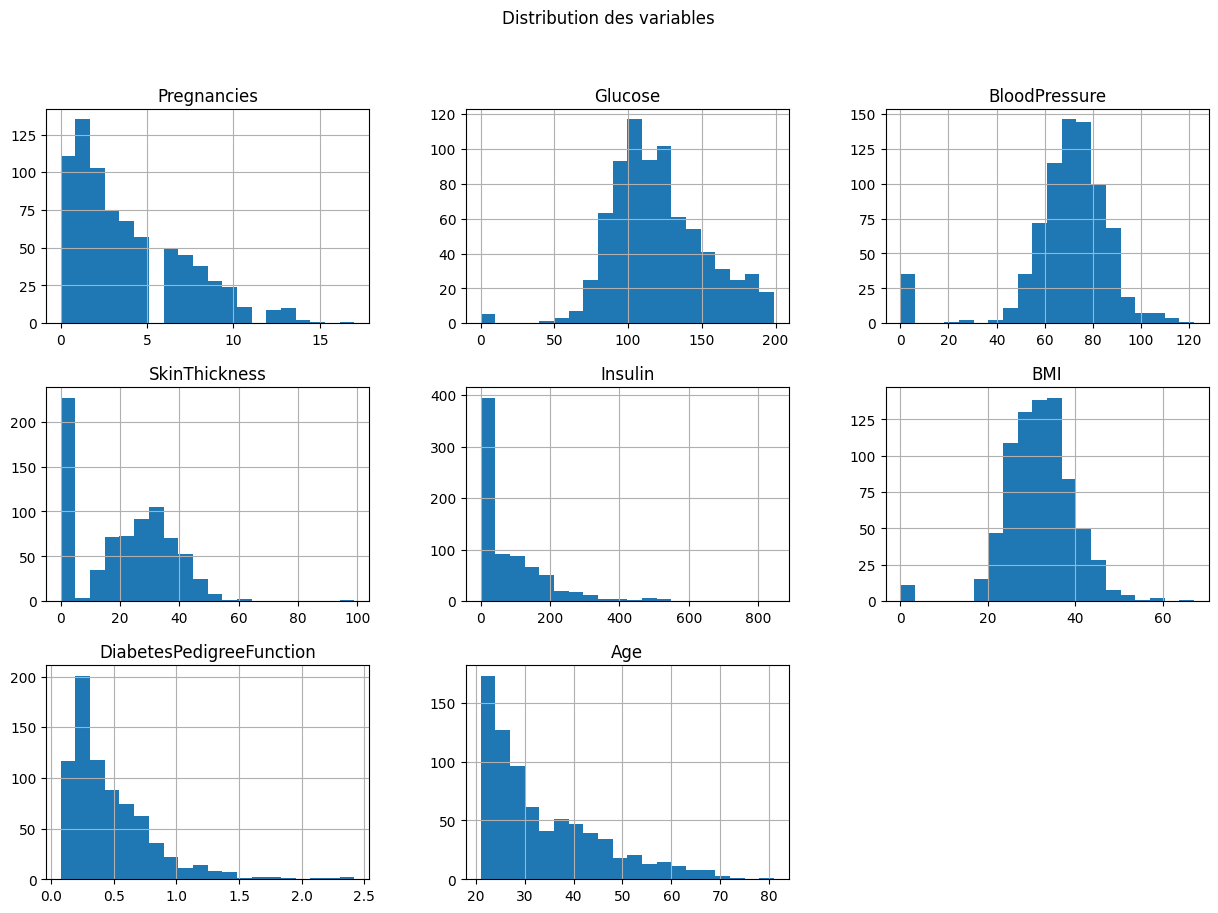

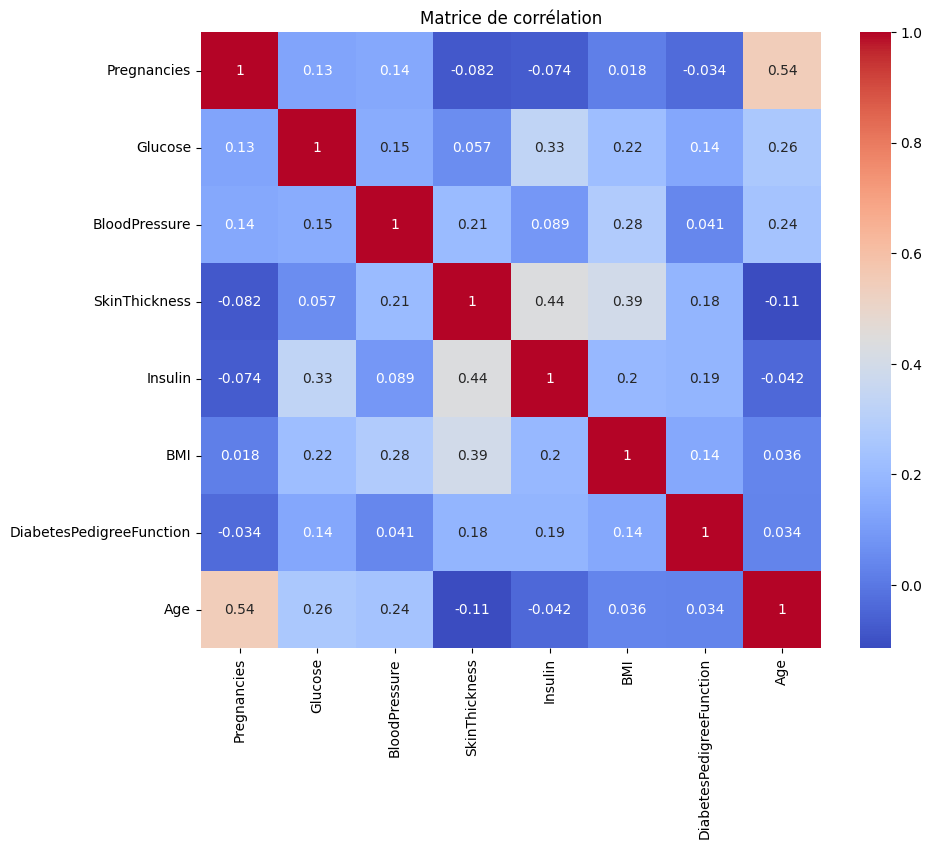

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suppression de la colonne inutile
df = df.drop(columns=['Unnamed: 0'])

# 1. Vérification des valeurs manquantes
print('--- Valeurs manquantes par colonne ---')
print(df.isnull().sum())

# 2. Recherche de doublons
print('\n--- Nombre de doublons ---')
print(df.duplicated().sum())

# 3. Statistiques descriptives
print('\n--- Statistiques descriptives ---')
display(df.describe())

# 4. Distribution des variables numériques
df.hist(bins=20, figsize=(15,10))
plt.suptitle('Distribution des variables')
plt.show()

# 5. Matrice de corrélation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

### Cell 3: Handling Missing Values
This cell replaces zeros (which are not valid for some features) with NaN, then imputes missing values with the median for each column. This ensures the dataset is ready for analysis without invalid or missing entries.

In [4]:
import numpy as np

# Colonnes où 0 = valeur manquante
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Remplacement des 0 par NaN
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

# Affichage du nombre de valeurs manquantes après remplacement
print('--- Valeurs manquantes après remplacement des 0 ---')
print(df.isnull().sum())

# Imputation par la médiane
for col in cols_with_missing:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

print('\n--- Vérification après imputation ---')
print(df.isnull().sum())

--- Valeurs manquantes après remplacement des 0 ---
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

--- Vérification après imputation ---
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


/tmp/ipython-input-4-2691598178.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median, inplace=True)


### Cell 4: Outlier Removal
This cell defines and applies a function to remove outliers from several columns using the IQR method. Outlier removal helps improve the quality of subsequent analyses and models.

In [5]:
# Liste des colonnes à vérifier
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Suppression des outliers via la méthode IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        before = df.shape[0]
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        after = df.shape[0]
        print(f'{col}: {before-after} outliers supprimés')
    return df

df_clean = remove_outliers_iqr(df, cols_to_check)

print(f'Nombre de lignes après suppression des outliers : {df_clean.shape[0]}')

Glucose: 0 outliers supprimés
BloodPressure: 14 outliers supprimés
SkinThickness: 85 outliers supprimés
Insulin: 310 outliers supprimés
BMI: 5 outliers supprimés
DiabetesPedigreeFunction: 17 outliers supprimés
Age: 5 outliers supprimés
Nombre de lignes après suppression des outliers : 332


### Cell 5: Feature Selection and Pairplot
This cell selects four relevant features for clustering and visualizes their pairwise relationships using a pairplot. This helps to understand the relationships and distributions among the selected features.

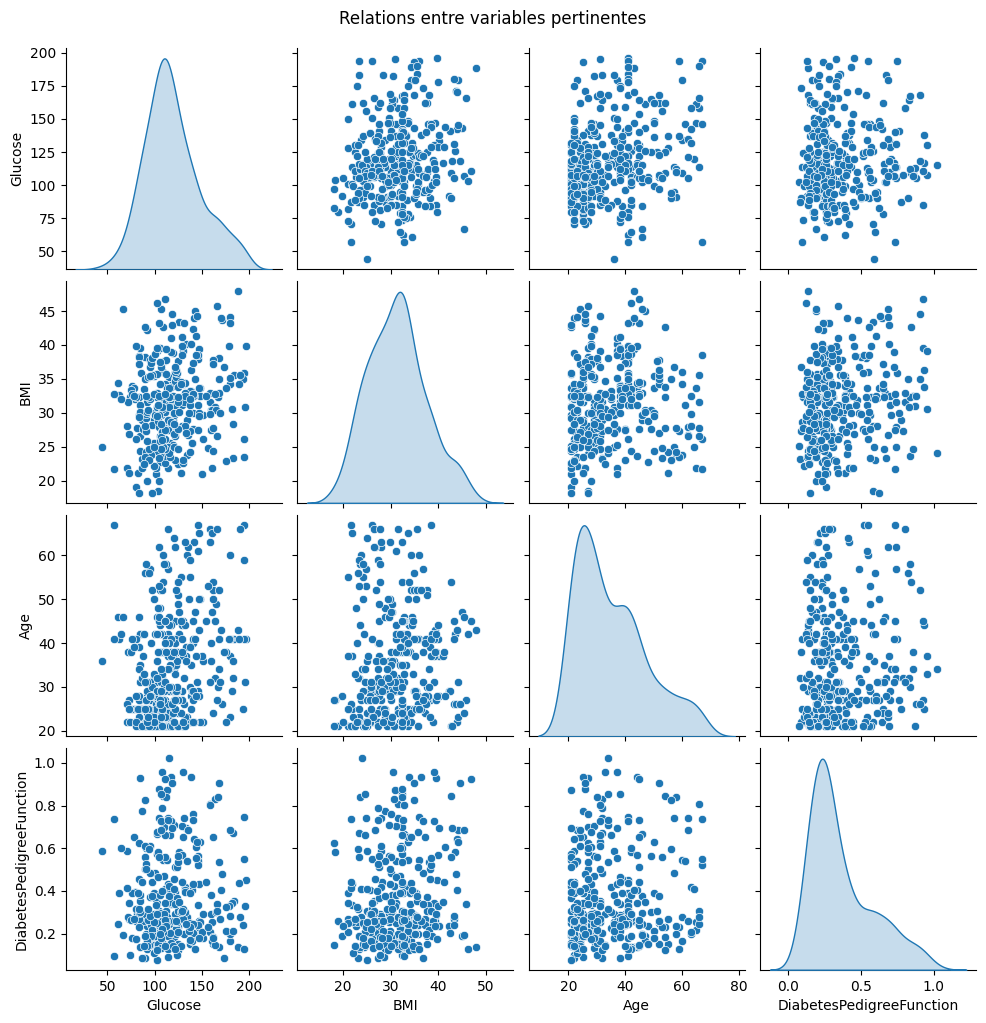

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des variables pertinentes pour le clustering
features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
df_cluster = df_clean[features]

# Visualisation des relations entre variables
sns.pairplot(df_cluster, diag_kind='kde')
plt.suptitle('Relations entre variables pertinentes', y=1.02)
plt.show()

### Cell 6: KMeans Clustering (Elbow Method)
This cell standardizes the selected features and uses the elbow method to determine the optimal number of clusters for KMeans clustering. The elbow plot helps to visually select the best k value.

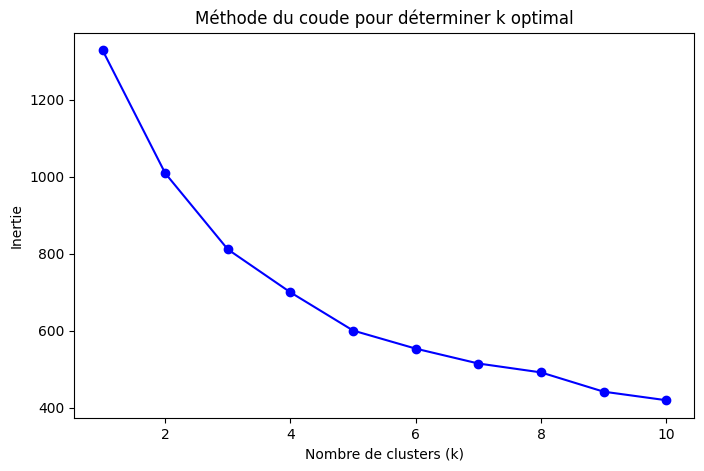

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Standardisation des variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Méthode du coude pour choisir k optimal
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer k optimal')
plt.show()

### Cell 7: KMeans Clustering and Visualization
This cell trains a KMeans model with k=3, assigns cluster labels, and visualizes the clusters on a scatterplot (Glucose vs BMI). It also prints the number of samples in each cluster.

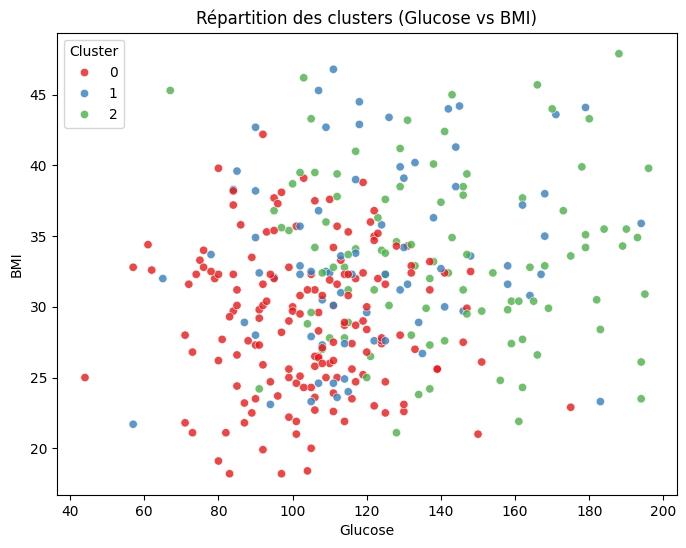

Cluster
0    159
2     98
1     75
Name: count, dtype: int64


In [8]:
# Entraînement du modèle K-Means avec k=3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Ajout de la colonne Cluster
df_clustered = df_cluster.copy()
df_clustered['Cluster'] = clusters

# Visualisation de la répartition des clusters
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Glucose', y='BMI',
    hue='Cluster',
    palette='Set1',
    data=df_clustered,
    alpha=0.8
)
plt.title('Répartition des clusters (Glucose vs BMI)')
plt.show()

# Nombre d'observations par cluster
print(df_clustered['Cluster'].value_counts())

### Cell 8: PCA for Cluster Visualization
This cell uses Principal Component Analysis (PCA) to reduce the data to two dimensions for visualization, and plots the clusters in the PCA-reduced space. This helps to visually assess the separation between clusters.

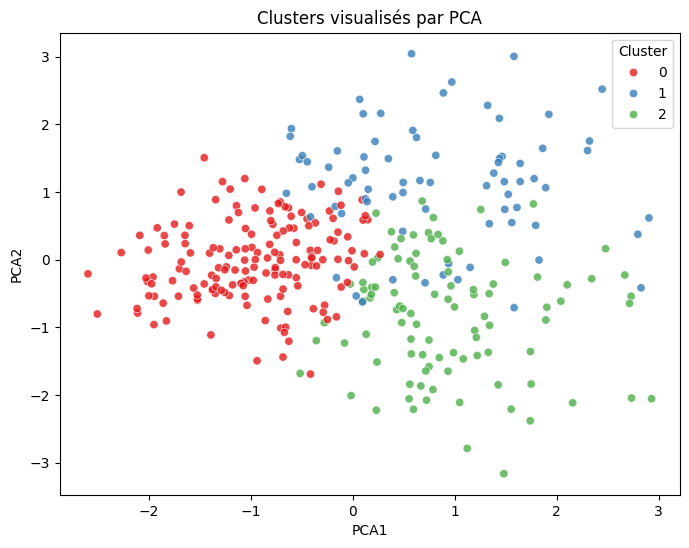

In [9]:
from sklearn.decomposition import PCA

# Réduction à 2 dimensions pour la visualisation
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Ajout des composantes principales au DataFrame
df_clustered['PCA1'] = X_pca[:, 0]
df_clustered['PCA2'] = X_pca[:, 1]

# Visualisation des clusters sur les axes PCA
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set1',
    data=df_clustered,
    alpha=0.8
)
plt.title('Clusters visualisés par PCA')
plt.show()

### Cell 9: Risk Categorization
This cell calculates the mean of each feature per cluster, defines a function to assign a risk category (high/low) based on feature thresholds, and maps each cluster to a risk category. It then counts the number of samples per risk category.

In [10]:
# Calcul des moyennes par cluster
cluster_means = df_clustered.groupby('Cluster')[['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']].mean()
display(cluster_means)

# Définition de la catégorie de risque
def risk_category(row):
    if (
        row['Glucose'] > 126 and
        row['BMI'] > 30 and
        row['DiabetesPedigreeFunction'] > 0.5
    ):
        return 'Haut risque'
    else:
        return 'Faible risque'

# Attribution de la catégorie à chaque cluster
risk_map = cluster_means.apply(risk_category, axis=1).to_dict()
df_clustered['risk_category'] = df_clustered['Cluster'].map(risk_map)

# Affichage du nombre d'observations par catégorie de risque
print(df_clustered['risk_category'].value_counts())

,Glucose,BMI,DiabetesPedigreeFunction,Age
Cluster,,,,
0,104.509434,28.952830,0.263082,28.113208
1,121.800000,33.652000,0.703227,35.813333
2,140.418367,33.570408,0.276837,46.520408


risk_category
Faible risque    332
Name: count, dtype: int64


### Cell 10: Train/Test Split and Oversampling
This cell prepares the features and target for supervised learning, splits the data into training and test sets, and uses oversampling to balance the classes in the training set. This ensures fair model training and evaluation.

In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Variable cible : le cluster
X = df_clustered[features]
y = df_clustered['Cluster']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Gestion du déséquilibre par sur-échantillonnage
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

print('Répartition des classes après sur-échantillonnage :')
print(pd.Series(y_train_res).value_counts())

Répartition des classes après sur-échantillonnage :
Cluster
0    127
1    127
2    127
Name: count, dtype: int64


### Cell 11: Model Training and Evaluation
This cell trains and evaluates four classifiers (Random Forest, SVM, Gradient Boosting, Logistic Regression), printing confusion matrices, classification reports, and cross-validated F1 scores for each. This helps compare model performance.

--- Random Forest ---


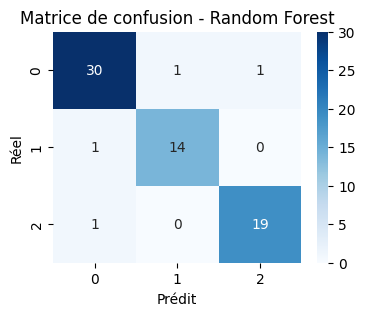

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        32
           1       0.93      0.93      0.93        15
           2       0.95      0.95      0.95        20

    accuracy                           0.94        67
   macro avg       0.94      0.94      0.94        67
weighted avg       0.94      0.94      0.94        67

F1-score moyen (validation croisée 5-fold) : 0.96

--- SVM ---


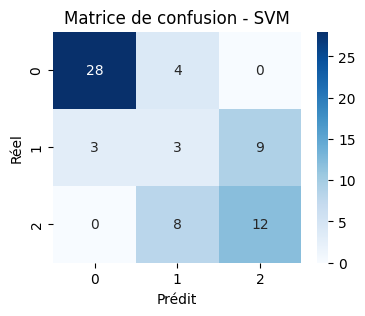

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.20      0.20      0.20        15
           2       0.57      0.60      0.59        20

    accuracy                           0.64        67
   macro avg       0.56      0.56      0.56        67
weighted avg       0.65      0.64      0.64        67

F1-score moyen (validation croisée 5-fold) : 0.60

--- Gradient Boosting ---


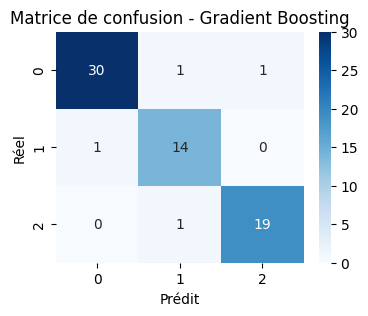

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.88      0.93      0.90        15
           2       0.95      0.95      0.95        20

    accuracy                           0.94        67
   macro avg       0.93      0.94      0.94        67
weighted avg       0.94      0.94      0.94        67

F1-score moyen (validation croisée 5-fold) : 0.94

--- Logistic Regression ---


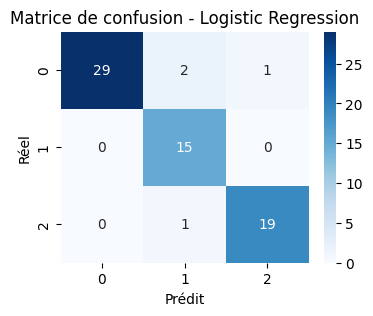

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.83      1.00      0.91        15
           2       0.95      0.95      0.95        20

    accuracy                           0.94        67
   macro avg       0.93      0.95      0.94        67
weighted avg       0.95      0.94      0.94        67

F1-score moyen (validation croisée 5-fold) : 0.95



In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

for name, model in models.items():
    print(f'--- {name} ---')
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matrice de confusion - {name}')
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
    plt.show()

    # Rapport de classification
    print(classification_report(y_test, y_pred))

    # Validation croisée (sur l'ensemble équilibré)
    scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='f1_weighted')
    print(f'F1-score moyen (validation croisée 5-fold) : {scores.mean():.2f}\n')

### Cell 12: Random Forest Hyperparameter Tuning
This cell uses grid search to find the best hyperparameters for the Random Forest classifier, printing the best parameters and F1 score. Hyperparameter tuning can improve model performance.

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)
grid.fit(X_train_res, y_train_res)

print('Meilleurs hyperparamètres :', grid.best_params_)
print('Meilleur score F1 (cross-val) :', grid.best_score_)

Meilleurs hyperparamètres : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Meilleur score F1 (cross-val) : 0.9630072872484596


### Cell 13: XGBoost Installation
This cell installs the XGBoost library if it is not already installed. XGBoost is a powerful gradient boosting framework for classification and regression tasks.

In [14]:
pip install xgboost

### Cell 14: XGBoost Hyperparameter Tuning
This cell uses randomized search to find the best hyperparameters for the XGBoost classifier, printing the best parameters and F1 score. This helps optimize the XGBoost model.

In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist, n_iter=20, cv=5, scoring='f1_weighted', n_jobs=-1, random_state=42
)
random_search.fit(X_train_res, y_train_res)

print('Meilleurs hyperparamètres XGBoost :', random_search.best_params_)
print('Meilleur F1-score (cross-val) :', random_search.best_score_)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:14:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Meilleurs hyperparamètres XGBoost : {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2}
Meilleur F1-score (cross-val) : 0.9736813865598755


### Cell 15: XGBoost Evaluation and Model Saving
This cell evaluates the best XGBoost model on the test set, shows the confusion matrix and classification report, and saves the trained model to a file for later use. This finalizes the modeling process and preserves the best model.

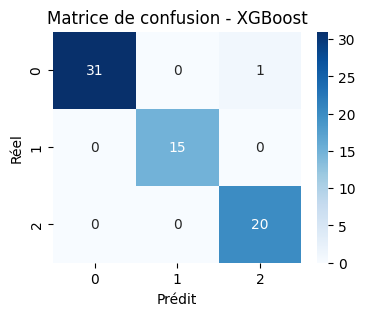

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       1.00      1.00      1.00        15
           2       0.95      1.00      0.98        20

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.99        67
weighted avg       0.99      0.99      0.99        67

Modèle XGBoost sauvegardé sous le nom best_xgboost_model.pkl


In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Prédiction sur le test set
y_pred = random_search.best_estimator_.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion - XGBoost')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

# Rapport de classification
print(classification_report(y_test, y_pred))

# Sauvegarde du modèle
joblib.dump(random_search.best_estimator_, 'best_xgboost_model.pkl')
print('Modèle XGBoost sauvegardé sous le nom best_xgboost_model.pkl')